In [1]:
from google.colab import files
uploaded = files.upload()


Saving car_evaluation.csv to car_evaluation.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info

<bound method DataFrame.info of      buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    med  unacc
1     vhigh  vhigh      2       2    small   high  unacc
2     vhigh  vhigh      2       2      med    low  unacc
3     vhigh  vhigh      2       2      med    med  unacc
4     vhigh  vhigh      2       2      med   high  unacc
...     ...    ...    ...     ...      ...    ...    ...
1722    low    low  5more    more      med    med   good
1723    low    low  5more    more      med   high  vgood
1724    low    low  5more    more      big    low  unacc
1725    low    low  5more    more      big    med   good
1726    low    low  5more    more      big   high  vgood

[1727 rows x 7 columns]>

In [8]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [10]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [11]:
x = df.drop(['class'], axis=1)
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.shape, x_test.shape

((1381, 6), (346, 6))

In [15]:
x_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [16]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,high,2,2,small,low
900,med,vhigh,3,4,small,med
1708,low,low,5more,2,big,high
705,high,med,4,2,med,med
678,high,med,3,2,med,med


In [17]:
!pip install category_encoders



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.5 MB/s eta 0:00:00


In [18]:
import category_encoders as ce


In [19]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [20]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [21]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7688


In [26]:
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [28]:
print('Training-set accuracy score', accuracy_score(y_train, y_pred_train_gini))

Training-set accuracy score 0.7921795800144823


In [27]:
print('Testing-set score:{:.4f}'.format(clf_gini.score(x_test, y_test)))
print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Testing-set score:0.7688
Test set score: 0.7688


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.5, 0.125, 'gini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.633\nsamples = 314\nvalue = [171, 54, 49, 40]')]

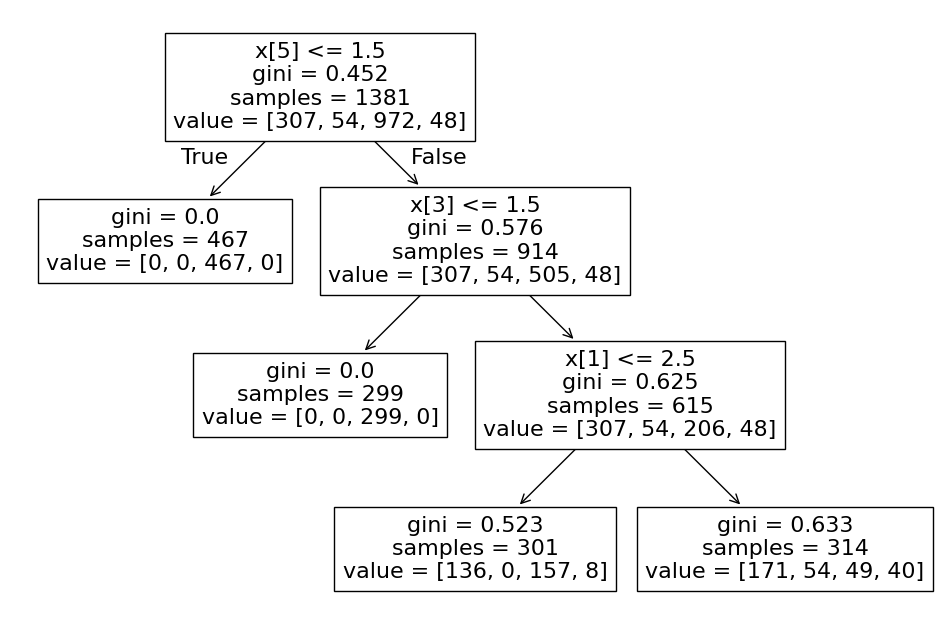

In [29]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))


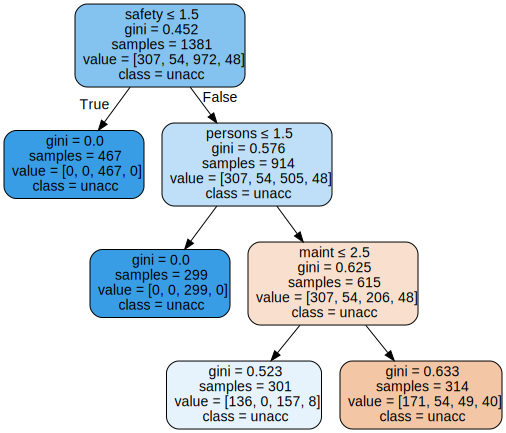

In [31]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=x_train.columns, class_names=y_train, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph